In [528]:
from symbol import pass_stmt

##Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [529]:
##Import Dataframes
titanic=pd.read_csv('/Users/kalebbarnes/Downloads/titanic/train.csv')
test = pd.read_csv('/Users/kalebbarnes/Downloads/titanic/test.csv')


## Titanic Survival Project
This project will focus on analyzing a data set of the passengers aboard the Titanic. The data set gives a list of features as well if they survived or not. We will focus on predicting if a passenger will survive or not. We are also provided with a test data set, however for simplicity we will focus on the train dataset that contains most of the sample. We will use both K nearest neighbors classicfication and Naive Bayes Classification and Ridge Classification to predict this. Unfortuantely we have significant amount of ages missing from the data set so we will use multiple linear regression models in order to predict age based on the features so that we can get as close as to an accurate sample as we can.

### The Features of the Dataset
- PassengerID (Gives a key for the passengers)
- Survived (Categorical variable indicating if passenger survived)
- Pclass (The class that the passenger was in)
- Name
- Sex
- Age
- SibSp (# of siblings / spouses aboard the Titanic)
- Parch (# of parents / children aboard the Titanic)
- Ticket (Ticket number)
- Fare (Ticket Fare)
- Cabin (Cabin Number)
- Embarked (Port of Embarkation)

### Dataset source
Kaggle
### Dataset name
Titanic dataset



### Data Cleaning
In this section of the project we cleaned the data by removing the features that either had no correlation to our target variable or were missing so many data points that they were un-useable. We also turned the Sex and Embarked variables into dummy categorical variables.

In [530]:
##Clean Training Data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [531]:
##Remove UnNeeded Columns
titanic = titanic.drop(["Name", "Cabin", "Ticket"], axis=1)
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.00000,1,0,7.25000,S
1,2,1,1,female,38.00000,1,0,71.28330,C
2,3,1,3,female,26.00000,0,0,7.92500,S
3,4,1,1,female,35.00000,1,0,53.10000,S
4,5,0,3,male,35.00000,0,0,8.05000,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.00000,0,0,13.00000,S
887,888,1,1,female,19.00000,0,0,30.00000,S
888,889,0,3,female,NaN,1,2,23.45000,S
889,890,1,1,male,26.00000,0,0,30.00000,C


In [532]:
##Get dummy Variables for Categorical Features
titanic = pd.get_dummies(titanic, columns=["Sex", "Embarked"], dtype = "int")

In [533]:
titanic

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.00000,1,0,7.25000,0,1,0,0,1
1,2,1,1,38.00000,1,0,71.28330,1,0,1,0,0
2,3,1,3,26.00000,0,0,7.92500,1,0,0,0,1
3,4,1,1,35.00000,1,0,53.10000,1,0,0,0,1
4,5,0,3,35.00000,0,0,8.05000,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.00000,0,0,13.00000,0,1,0,0,1
887,888,1,1,19.00000,0,0,30.00000,1,0,0,0,1
888,889,0,3,NaN,1,2,23.45000,1,0,0,0,1
889,890,1,1,26.00000,0,0,30.00000,0,1,1,0,0


In [534]:

##Scale Fare
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_features = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
cat_features = ['Survived', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

ct = ColumnTransformer([
    ('scale', StandardScaler(), num_features)
], remainder='passthrough')


In [535]:
ct.fit(titanic)
titanic_ct = ct.transform(titanic)
titanic_ct = pd.DataFrame(titanic_ct, columns=num_features + cat_features)


In [536]:
scaler = ct.named_transformers_['scale']


## Data Exploration
We will complete basic data exploration to explore the individual relationships between our target feature and the other features.

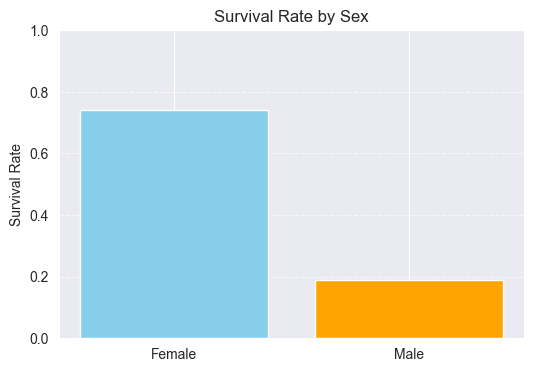

In [537]:
survival_by_sex = titanic.groupby('Sex_male')['Survived'].mean()
plt.figure(figsize=(6, 4))
plt.bar(['Female', 'Male'], survival_by_sex, color=['skyblue', 'orange'])
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Sex')
plt.ylim(0, 1)  # Survival rate ranges from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

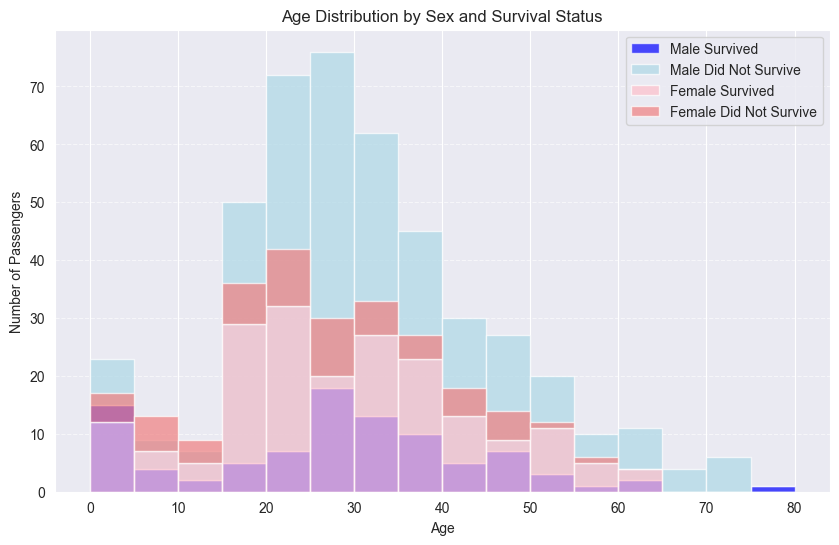

In [538]:

male_survived = titanic[(titanic['Sex_male'] == 1) & (titanic['Survived'] == 1)]['Age']
male_dead = titanic[(titanic['Sex_male'] == 1) & (titanic['Survived'] == 0)]['Age']
female_survived = titanic[(titanic['Sex_female'] == 1) & (titanic['Survived'] == 1)]['Age']
female_dead = titanic[(titanic['Sex_female'] == 1) & (titanic['Survived'] == 0)]['Age']

plt.figure(figsize=(10, 6))
bins = range(0, 85, 5)

plt.hist([male_survived, male_dead],
         bins=bins, stacked=True, color=['blue', 'lightblue'], label=['Male Survived', 'Male Did Not Survive'], alpha=0.7)

plt.hist([female_survived, female_dead],
         bins=bins, stacked=True, color=['pink', 'lightcoral'], label=['Female Survived', 'Female Did Not Survive'], alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Age Distribution by Sex and Survival Status')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

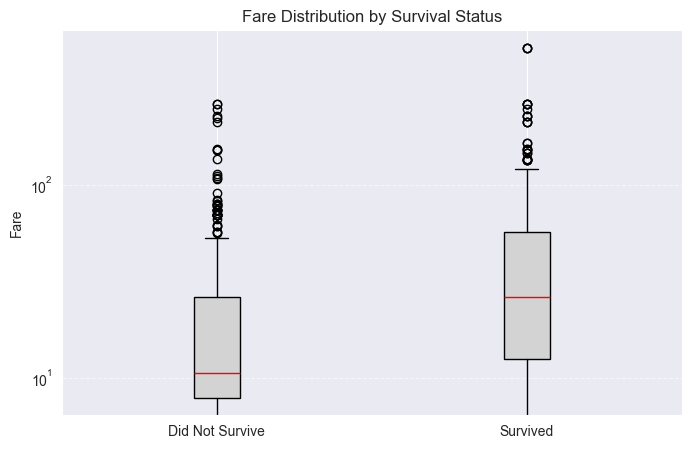

In [539]:
# Prepare data
survived_fare = titanic[titanic['Survived'] == 1]['Fare']
not_survived_fare = titanic[titanic['Survived'] == 0]['Fare']

# Plot
plt.figure(figsize=(8, 5))
plt.boxplot([not_survived_fare, survived_fare], tick_labels=['Did Not Survive', 'Survived'], patch_artist=True,
            boxprops=dict(facecolor='lightgray'), medianprops=dict(color='red'))

plt.ylabel('Fare')
plt.title('Fare Distribution by Survival Status')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.yscale('log')  # Optional: to handle the long tail in fare distribution

plt.show()

In [540]:
##Linear Regression for missing Age Values
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix

##Split Data into Known and Unknown Age
age_known = titanic_ct[titanic_ct["Age"].notna()]
age_unknown = titanic_ct[titanic_ct['Age'].isna()]

In [541]:
##Create X and Y
X_lr = age_known.drop(["Age"], axis=1)
Y_lr = age_known["Age"]

(571, 11) (143, 11) (571,) (143,)
(571, 11) (143, 11) (571,) (143,)
('PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_S')
0.28541520210011184
[0.16175062159356057, 0.26272687745080914, 0.27212255329639945, 0.27917382659083034, 0.283922447750642, 0.2854066660547815, 0.28541520210011184, 0.28541520210011184, 0.28541520210011184, 0.28541520210011184, 0.28541520210011184]


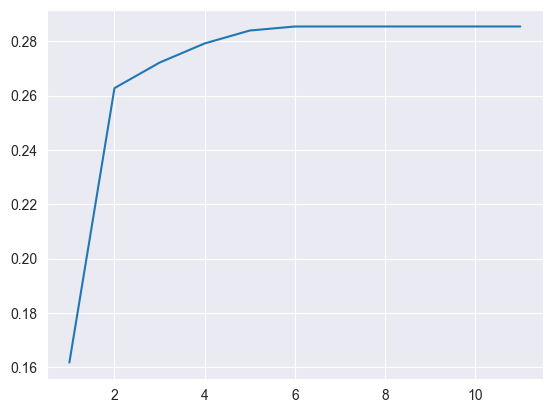

In [542]:
##Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X_lr, Y_lr, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

##Determine best features
import itertools
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

##Function for Exhaustive Subset Selection for Multilinear Regression of Age

def exhaustive_selection(X: "DataFrame", y: "DataFrame", model: "Regression") -> list:
    best_score: float = -np.inf
    best_features: list = None
    best_scores: list = []
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    for k in range(1, len(X.columns) + 1):
        for subset in itertools.combinations(X.columns, k):
            model = model
            model.fit(X_train[list(subset)], Y_train)
            y_pred = model.predict(X_test[list(subset)])
            score = r2_score(Y_test, y_pred)

            if score > best_score:
                best_features = subset
                best_score = score

        best_scores.append(best_score)

    print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
    print(best_features)
    print(np.max(best_scores))
    print(best_scores)
    plt.plot(range(1, len(X.columns) + 1), best_scores)
    plt.show()
    return best_features

##Call Function for Linear Regression
best_subset_lr = exhaustive_selection(X_lr, Y_lr, LinearRegression())

best_subset_lr

In [543]:
X_train_bf = X_train[list(best_subset_lr)]
X_test_bf = X_test[list(best_subset_lr)]
X_train_bf

,PassengerId,Pclass,SibSp,Parch,Fare,Embarked_C,Embarked_S
328,-0.45488,0.82738,0.43279,0.76763,-0.23516,0.00000,1.00000
73,-1.44629,0.82738,0.43279,-0.47367,-0.35739,1.00000,0.00000
253,-0.74647,0.82738,0.43279,-0.47367,-0.32425,0.00000,1.00000
719,1.06528,0.82738,-0.47455,-0.47367,-0.49187,0.00000,1.00000
666,0.85922,-0.36936,-0.47455,-0.47367,-0.38667,0.00000,1.00000
...,...,...,...,...,...,...,...
92,-1.37242,-1.56611,0.43279,-0.47367,0.58332,0.00000,1.00000
134,-1.20913,-0.36936,-0.47455,-0.47367,-0.38667,0.00000,1.00000
337,-0.41989,-1.56611,-0.47455,-0.47367,2.05969,1.00000,0.00000
548,0.40045,0.82738,0.43279,0.76763,-0.23516,0.00000,1.00000


In [544]:

##Fit the Model
lr = LinearRegression(positive=True)
lr.fit(X_train_bf, Y_train)

##Coef and Intercept
print(lr.coef_, lr.intercept_)

[0.02911677 0.         0.         0.         0.10514255 0.1418032
 0.13131498] -0.11268180051458956


In [545]:
#Test Accuracy
y_pred = lr.predict(X_test_bf)
MAE = mean_absolute_error(Y_test, y_pred)
MSE = mean_squared_error(Y_test, y_pred)
R2 = r2_score(Y_test, y_pred)
RMSE = np.sqrt(MSE)
print(MAE, MSE, RMSE, R2)

0.7588174730539518 0.898052052012762 0.9476560831930336 -0.02069285645349428


(571, 11) (143, 11) (571,) (143,)
('PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_S')
0.2848216352823689
[0.16165769699047983, 0.26283813488547303, 0.27216295360560094, 0.27919859182949225, 0.28322588519067904, 0.28480861581878725, 0.2848216352823689, 0.2848216352823689, 0.2848216352823689, 0.2848216352823689, 0.2848216352823689]


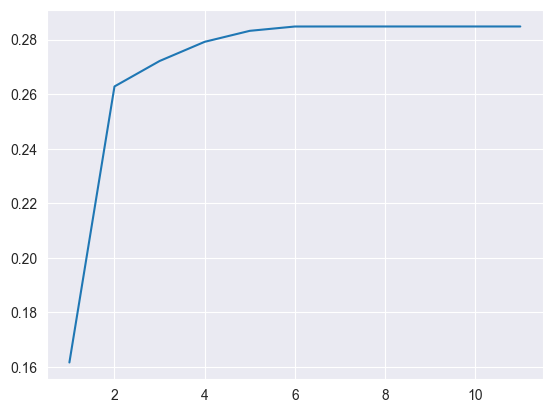

In [546]:
##Import Ridge Regression
from sklearn.linear_model import Ridge

##Call function for subset Selection
best_subset_rr = exhaustive_selection(X_lr, Y_lr, Ridge())
X_train_bf = X_train[list(best_subset_rr)]
X_test_bf = X_test[list(best_subset_rr)]

In [547]:
##Fit the model
ridge = Ridge(positive=True)
ridge.fit(X_train_bf, Y_train)

Ridge(positive=True)

In [548]:
##Test Accuracy
y_pred = ridge.predict(X_test_bf)
MAE = mean_absolute_error(Y_test, y_pred)
MSE = mean_squared_error(Y_test, y_pred)
R2 = r2_score(Y_test, y_pred)
RMSE = np.sqrt(MSE)
print(MAE, MSE, RMSE, R2)

0.7552672018880547 0.8908663234639201 0.9438571520436343 -0.012525822280164967


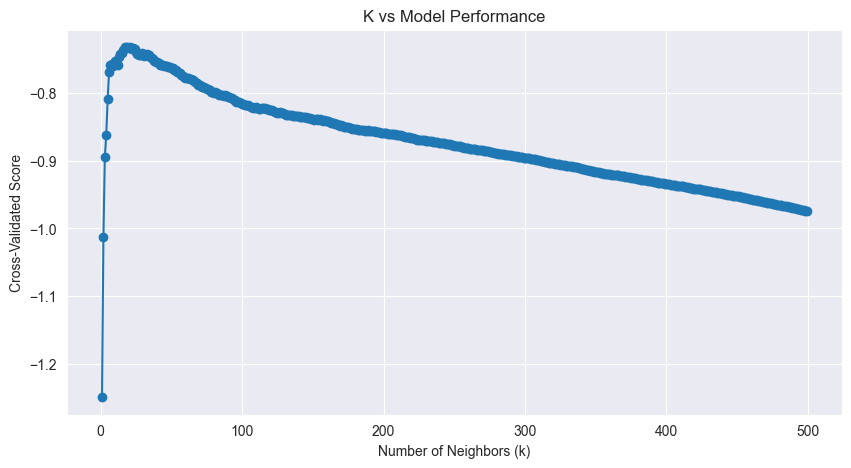

21


In [549]:
##KNN Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

k_range = range(1, 500)
cv_scores = []

##Fit the Model
for k in k_range:
    knnreg = KNeighborsRegressor(n_neighbors=k)
    score = cross_val_score(knnreg, X_lr, Y_lr, cv = 5, scoring = 'neg_mean_squared_error')
    cv_scores.append(score.mean())

best_k = k_range[np.argmax(cv_scores)]
# Plotting k vs performance
plt.figure(figsize=(10, 5))
plt.plot(k_range, cv_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Score')
plt.title('K vs Model Performance')
plt.grid(True)
plt.show()
print(best_k)

In [550]:
##Test Accuracy
knnreg = KNeighborsRegressor(n_neighbors=best_k)
knnreg.fit(X_train, Y_train)
y_pred= knnreg.predict(X_test)
MAE = mean_absolute_error(Y_test, y_pred)
MSE = mean_squared_error(Y_test, y_pred)
R2 = r2_score(Y_test, y_pred)
RMSE = np.sqrt(MSE)
print(MAE, MSE, RMSE, R2)

0.6497046953794486 0.6457282611780175 0.8035721879072331 0.26608906252443754


In [551]:
##Clean age_unknown
age_unknown_X = age_unknown.drop(["Age"], axis=1)
age_unknown_X

,PassengerId,Pclass,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
5,-1.71067,0.82738,-0.47455,-0.47367,-0.47812,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000
17,-1.66401,-0.36936,-0.47455,-0.47367,-0.38667,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000
19,-1.65624,0.82738,-0.47455,-0.47367,-0.50295,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000
26,-1.62902,0.82738,-0.47455,-0.47367,-0.50295,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000
28,-1.62125,0.82738,-0.47455,-0.47367,-0.48978,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...
859,1.60958,0.82738,-0.47455,-0.47367,-0.50286,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000
863,1.62514,0.82738,6.78416,2.00893,0.75195,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000
868,1.64457,0.82738,-0.47455,-0.47367,-0.45714,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000
878,1.68345,0.82738,-0.47455,-0.47367,-0.48944,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000


### Replacing the missing ages with our predictions based on the best model which ended up being poisson regression

In [552]:
##Predict ages with best model
age_predictions = knnreg.predict(age_unknown_X)

In [553]:
##Replace Values
titanic_ct.loc[titanic_ct["Age"].isna(), "Age"] = age_predictions

In [554]:
##Undo scale and add to titanic
titanic_ct = scaler.inverse_transform(titanic_ct[num_features])

In [555]:
titanic_ct = pd.DataFrame(titanic_ct, columns = [num_features])
titanic[num_features] = titanic_ct[num_features]

In [556]:

titanic_ct = ct.fit_transform(titanic)
titanic_ct = pd.DataFrame(titanic_ct, columns = [num_features + cat_features])
titanic_ct

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,-1.73011,0.82738,-0.57048,0.43279,-0.47367,-0.50245,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000
1,-1.72622,-1.56611,0.61617,0.43279,-0.47367,0.78685,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000
2,-1.72233,0.82738,-0.27382,-0.47455,-0.47367,-0.48885,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000
3,-1.71844,-1.56611,0.39367,0.43279,-0.47367,0.42073,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000
4,-1.71456,0.82738,0.39367,-0.47455,-0.47367,-0.48634,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
886,1.71456,-0.36936,-0.19965,-0.47455,-0.47367,-0.38667,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000
887,1.71844,-1.56611,-0.79298,-0.47455,-0.47367,-0.04438,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000
888,1.72233,0.82738,-0.54576,0.43279,2.00893,-0.17626,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000
889,1.72622,-1.56611,-0.27382,-0.47455,-0.47367,-0.04438,1.00000,0.00000,1.00000,1.00000,0.00000,0.00000


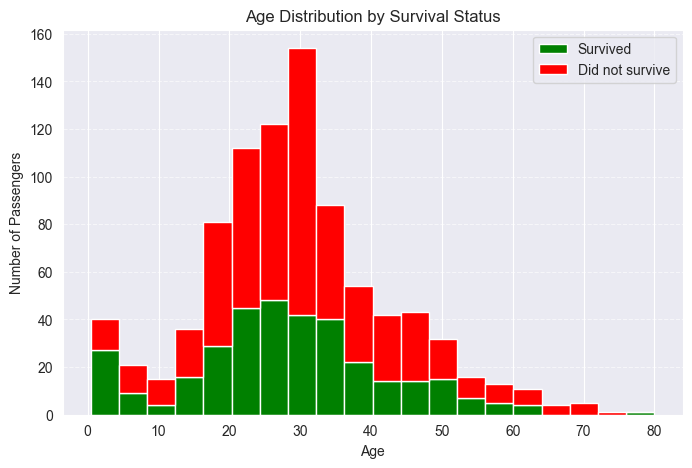

In [557]:
survived = titanic[titanic["Survived"] == 1]["Age"]
dead = titanic[titanic["Survived"] == 0]["Age"]

plt.figure(figsize=(8, 5))
plt.hist([survived, dead], bins=20, stacked=True,
         color=['green', 'red'], label=['Survived', 'Did not survive'])

plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Age Distribution by Survival Status')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

### Train Test Split for prediction of our target variable

In [558]:
##Seperate X and Y for Survival Predictions
titanic_ct.sort_index(ascending=True, inplace=True)

In [559]:
print(titanic_ct.columns)

MultiIndex([('PassengerId',),
            (     'Pclass',),
            (        'Age',),
            (      'SibSp',),
            (      'Parch',),
            (       'Fare',),
            (   'Survived',),
            ( 'Sex_female',),
            (   'Sex_male',),
            ( 'Embarked_C',),
            ( 'Embarked_Q',),
            ( 'Embarked_S',)],
           )


In [560]:

titanic_Y = titanic_ct["Survived"]
titanic_X = titanic_ct.drop(["Survived"], axis=1, level = 0)


In [561]:
 titanic_Y = titanic_Y.astype("int")
 titanic_Y = titanic_Y[["Survived"]].values


In [562]:
 titanic_Y  = titanic_Y.ravel()

In [563]:
#Train Test Split
x_train, x_test, y_train, y_test = train_test_split(titanic_X, titanic_Y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((623, 11), (268, 11), (623,), (268,))

### Classifications for the prediction of our target variable survival

In [564]:
##Naive Bayes
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

##Find best subselction


In [565]:
#Fit the model
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

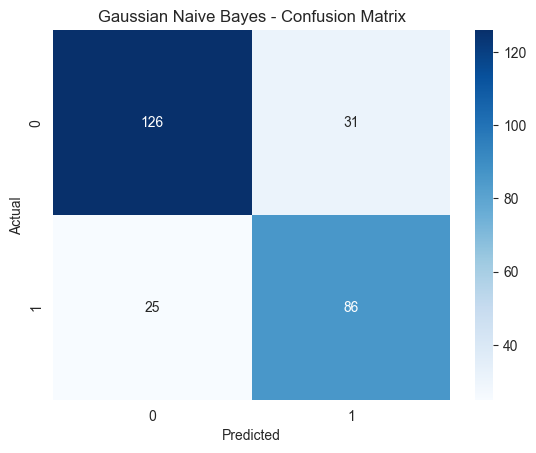

In [566]:
##Plotting the accuracy of Gaussian Naive Bayes Classification
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Gaussian Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

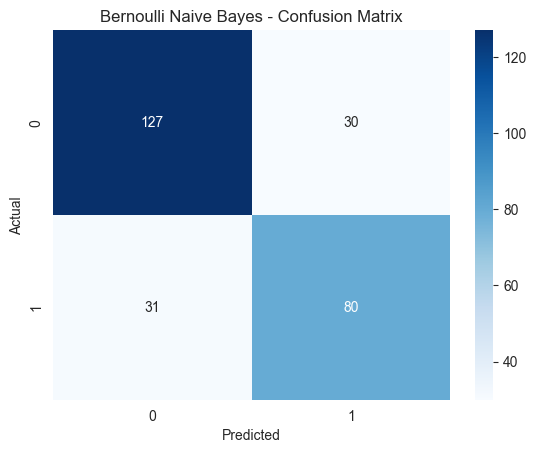

In [567]:
##Fit the Bernoulli Model
bnb = BernoulliNB()
bnb.fit(x_train, y_train)
y_pred = bnb.predict(x_test)

##Plotting the accuracy of Ridge Classification
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Bernoulli Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

(712, 11) (179, 11) (712,) (179,)
(('Pclass',), ('Age',), ('Parch',), ('Sex_female',))
0.17065637065637063
[0.10154440154440147, 0.10154440154440147, 0.12458172458172456, 0.17065637065637063, 0.17065637065637063, 0.17065637065637063, 0.17065637065637063, 0.17065637065637063, 0.17065637065637063, 0.17065637065637063, 0.17065637065637063]


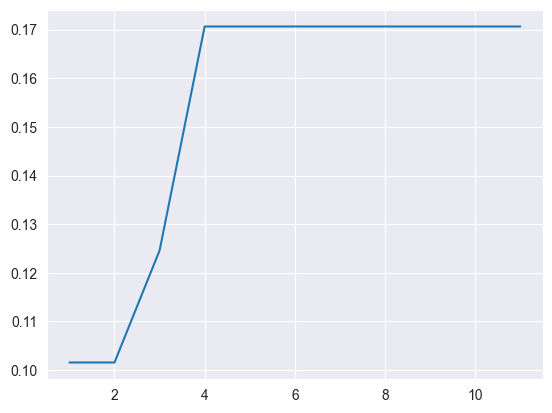

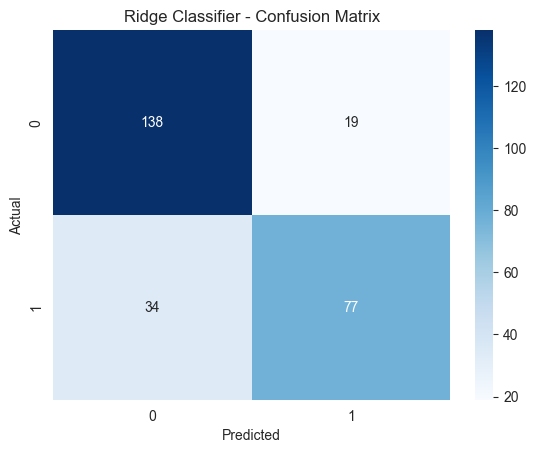

In [568]:
##RidgeClassifier
from sklearn.linear_model import RidgeClassifier

##Fit the Model
best_subset_rrc = exhaustive_selection(titanic_X, titanic_Y, RidgeClassifier())
X_train_bf = x_train[list(best_subset_rrc)]
X_test_bf = x_test[list(best_subset_rrc)]
rrc = RidgeClassifier()
rrc.fit(X_train_bf, y_train)
y_pred= rrc.predict(X_test_bf)

##Plotting the accuracy of Ridge Classification
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Ridge Classifier - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [513]:
rrc.coef_, rrc.intercept_, rrc.score(x_test[list(best_subset_rrc)], y_test)

(array([-0.29750243, -0.13883751, -0.07140759,  1.00047903]),
 array([-0.59275537]),
 0.8022388059701493)

In [569]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
#Normal train test split In RMSE and out RMSE
k_range = range(1,200)
inRMSE = []
outRMSE = []
best_k = int

##In Rmse
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    RMSE = np.sqrt(mean_squared_error(y_train, knn.predict(x_train)))
    inRMSE.append(RMSE)

##OutRMSE
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    RMSE = np.sqrt(mean_squared_error(y_test, knn.predict(x_test)))
    outRMSE.append(RMSE)

    if RMSE < np.min(outRMSE):
        best_k = i


In [570]:
best_k = k_range[np.argmin(outRMSE)]
best_k

9

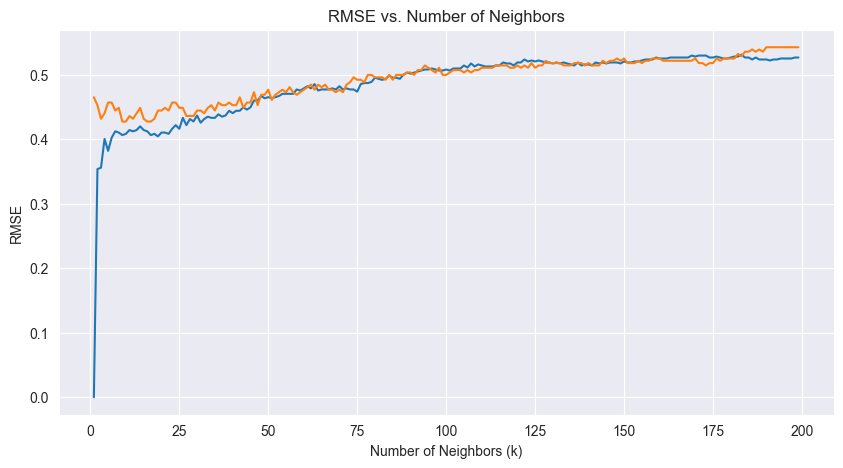

In [571]:
##Graph the inRMSE and outRMSE
k_range = range(1, 200)
plt.figure(figsize=(10, 5))
plt.plot(k_range, inRMSE, k_range, outRMSE)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('RMSE')
plt.title('RMSE vs. Number of Neighbors')
plt.grid(True)
plt.show()


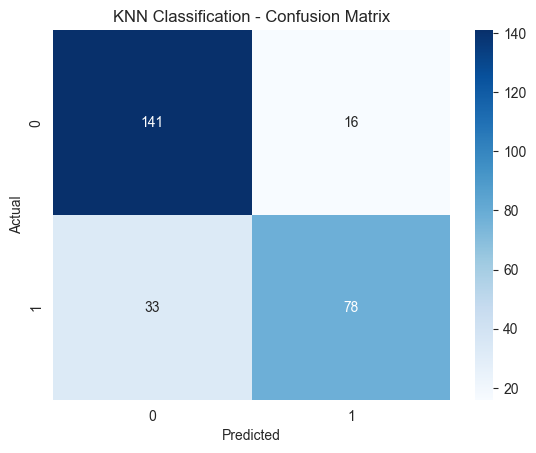

In [573]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

##Plotting the accuracy of KNN Classification
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("KNN Classification - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()